In [ ]:
import pandas as pd
import numpy as np

# **Counting missing rows with left join**

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you in the first lines of the codecell given below.


**Instructions:**

In [ ]:
#Load movies DataFrame from the dataset file
import pandas as pd
movies = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/movies.p")
#Load financials DataFrame from the dataset file
financials = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/financials.p")

#Explore the first few rows of data from movies and financials
print(movies.head())
print(financials.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [ ]:
import ee
import geemap
import ipyleaflet
import ipywidgets as widgets
radio_buttons = widgets.RadioButtons(
    options=["on='budget'", "on='popularity'", "on='id'"], value="on='id'", description="1. What column is likely the best column to merge the two tables on? on='budget' on='popularity' on='id'"
)
radio_buttons

RadioButtons(description="1. What column is likely the best column to merge the two tables on? on='budget' on=…

**Instructions: (Continued)**
* Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.
* Count the number of rows in `movies_financials` with a null value in the `budget` column.

In [6]:
# Merge movies and financials with a left join
import pandas as pd

# Load the data
movies = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/movies.p")
financials = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/financials.p")

# Merge the movies and financials DataFrames using a left join
movies_financials = pd.merge(movies, financials, on='id', how='left')

# Count rows with null values in the 'budget' column
null_budget_count = movies_financials['budget'].isnull().sum()

# Print the result
print(f"Number of rows with null values in the 'budget' column: {null_budget_count}")



Number of rows with null values in the 'budget' column: 1574


# **Enriching a dataset**

Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the Toy Story movies. The `toy_story` and `taglines` DataFrames have been loaded in the first lines of the codecell given below.

Instructions:
1. Merge `toy_story` and `taglines` on the `id` column with a left join, and save the result as `toystory_tag`.

2. The with `toy_story` as the left table, merge to it `taglines` on the `id` column with an inner join, and save as `toystory_tag`.


In [7]:
#Load taglines DataFrame from dataset file
taglines = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/taglines.p")

#Load movie_genres DataFrame from dataset file
movie_genres = pd.read_pickle("https://raw.githubusercontent.com/DataAnalyst21/DatasetsForDataAnalytics/main/movie_to_genres.p")

#Filter the Toy Story genre movies from movie_genres
toy_story = movies[movies['title'].str.contains('Toy Story')]

#Explore the first few rows from taglines, toy_story and movie_genres
print(taglines.head())
print(movie_genres.head())
print(toy_story.head())



# Merge the toy_story and taglines tables with a left join
toystory_tag = pd.merge(toy_story, taglines, on='id', how='left')


# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# Inner join: toy_story as the left table
scifi_only_movies = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')




# Print the rows and shape of toystory_tag
print(toystory_tag_inner)
print(toystory_tag_inner.shape)

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
         id        title  popularity release_date
103   10193  Toy Story 3   59.995418   2010-06-16
2637    863  Toy Story 2   73.575118   1999-10-30
3716    862    Toy Story   73.640445   1995-10-30
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30             

NameError: name 'scifi_only' is not defined

# **Right join to find unique movies**

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the `movies` table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The `movies` table is loaded in one of the previous codecells and `scifi_movies`, and `action_movies` tables have been filtered and assigned to in the first few lines in the codecell below.

**Instructions:**

1. Merge `action_movies` and `scifi_movies` tables with a right join on `movie_id`. Save the result as `action_scifi`.
2. Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.

3. From `action_scifi`, subset only the rows where the `genre_act` column is null.

4. Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.



In [8]:
#Filtering scifi_movies and action_movies from movie_genres
scifi_movies = movie_genres[movie_genres['genre'] == 'Science Fiction']
action_movies = movie_genres[movie_genres['genre'] == 'Action']

#Exploring the first few rows of scifi_movies and action_movies
print(scifi_movies.head())
print(action_movies.head())

# 1. Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')


# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# 2. Merge action_movies to scifi_movies with right join with suffixes
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=('_act', '_scifi'))


# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# 3. From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# 4. Merge the movies and scifi_only tables with an inner join
scifi_only_movies = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')


# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

    movie_id            genre
2         11  Science Fiction
17        18  Science Fiction
20        19  Science Fiction
38        38  Science Fiction
49        62  Science Fiction
    movie_id   genre
3         11  Action
14        18  Action
25        22  Action
26        24  Action
42        58  Action
   movie_id genre_x          genre_y
0        11  Action  Science Fiction
1        18  Action  Science Fiction
2        19     NaN  Science Fiction
3        38     NaN  Science Fiction
4        62     NaN  Science Fiction
   movie_id genre_act      genre_scifi
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


NameError: name 'movies_and_scifi_only' is not defined

# **Popular genres with right join**

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movie_genres` it's called `movie_id`.

The `movie_genres` table have been loaded in one of the previous codecell and `pop_movies` is filtered from `movies` in the first lines of the codecell below.

**Instructions:**
* Merge `movie_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
* Group `genres_movies` by genre and count the number of id values.


          id                    title  popularity release_date
4546  211672                  Minions  875.581305   2015-06-17
4343  157336             Interstellar  724.247784   2014-11-05
1966  293660                 Deadpool  514.569956   2016-02-09
2423  118340  Guardians of the Galaxy  481.098624   2014-07-30
4220   76341       Mad Max: Fury Road  434.278564   2015-05-13


NameError: name 'plt' is not defined

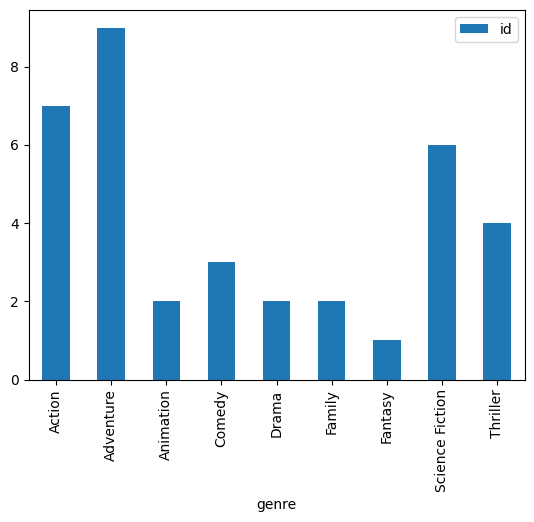

In [ ]:
#Sorting movies by popularity and taking the first 10 most popular movies to pop_movies
movies_sorted = movies.sort_values('popularity', ascending=False)
pop_movies = movies_sorted[:10]

#Exploring the first few rows of pop_movies
print(pop_movies.head())

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_genres.merge(pop_movies, left_on='movie_id', right_on='id', how='right')


# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

# **Using outer join to select actors**

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: *Iron Man 1* and *Iron Man 2*. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The *Iron Man 1* table is called `iron_1_actors`, and *Iron Man 2* table is called `iron_2_actors`. Both tables have been loaded in the first few lines of the codecell given below for you and a few rows printed so you can see the structure.

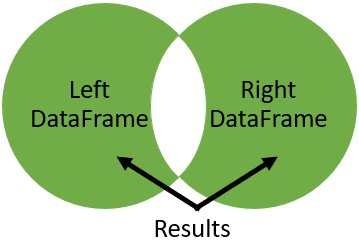

**Instructions:**
* Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the `id` column, and set suffixes to `('_1','_2')`.
* Create an index that returns `True` if `name_1` or `name_2` are null, and False otherwise.


In [9]:
#Read movie_actors and load iron_1_actors and iron_2_actors from dataset files
import numpy as np
import pandas as pd
iron_1_actors = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/iron_1_actors.csv?raw=True')
iron_2_actors = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/iron_2_actors.csv?raw=True')

#Exploring the first few rows of iron_1_actors and iron_2_actors
print(iron_1_actors.head())
print(iron_2_actors.head())

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how='outer', suffixes=('-1', '_2'))



# Create an index that returns true if name_1 or name_2 are null
m=((iron_1_and_2['iron_1_actors'].isnull()) | (iron_1_and_2['iron_2_actors'].isnull()))




# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                     character     id             name
0                       Yinsen  17857       Shaun Toub
1      Virginia "Pepper" Potts  12052  Gwyneth Paltrow
2  Obadiah Stane / Iron Monger   1229     Jeff Bridges
3                  War Machine  18288  Terrence Howard
4           Christine Everhart  57451      Leslie Bibb
                                          character     id                name
0                             Ivan Vanko / Whiplash   2295       Mickey Rourke
1  Natalie Rushman / Natasha Romanoff / Black Widow   1245  Scarlett Johansson
2                                     Justin Hammer   6807        Sam Rockwell
3                                Director Nick Fury   2231   Samuel L. Jackson
4                           Virginia "Pepper" Potts  12052     Gwyneth Paltrow


KeyError: 'iron_1_actors'

# **Self join**

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The `crews` table has been loaded for you in the first lines of the codecell given below.

**Instructions:**
* To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.
* Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the job of `'Director'` and avoids rows with the job of `'Director'` in the right table.
* Use the `.head()` method to print the first few rows of `direct_crews`.


In [10]:
#Load crew table from the dataset file
crews = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/crews.p?raw=True')

# Print the first few rows of the crew table.
print(crews.head())

crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir', '_crew'))

# Create a Boolean index to filter rows where the left table's job is 'Director' and the right table's job is not 'Director'
boolean_filter = (crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director')

# Apply the filter to the merged table
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())



      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron
        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays

# **Index merge for movie ratings**

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns all rows from the `movies` table, and only matching rows from the `ratings` table.

The movies table is loaded before and ratings table is loaded in the first few lines of the codecell given below for you to use.

**Instructions:**
* Merge the `movies` and `ratings` tables on the `id` column, keeping all rows from the `movies` table, and save the result as `movies_ratings`.


In [11]:
#Load ratings DataFrame from the dataset file
ratings = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/ratings.p?raw=True')

# Print the first few rows of ratings
print(ratings.head())

# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.9      4500.0
2  206647           6.3      4466.0
3   49026           7.6      9106.0
4   49529           6.1      2124.0
      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


# **Do sequels earn more?**

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The financials table is loaded before and sequels table is loaded in the first few lines in the codecell below for you to use.

**Instructions:**
* With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.
* Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to `('_org','_seq')`, saving to `orig_seq`.
* Select the `title_org`, `title_seq`, and `diff` columns of `orig_seq` and save this as `titles_diff`.
* Sort by `titles_diff` by `diff` in descending order and print the first few rows.



In [12]:
#Loading sequels DataFrame from the source dataset file
sequels = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/sequels.p?raw=True')

# Print the first few rows of sequels
print(sequels.head())

# Merge sequels with financials using a left join
sequels_fin = sequels.merge(financials, on='id', how='left')

# Merge sequels_fin with itself using an inner join
orig_seq = sequels_fin.merge(
    sequels_fin,
    left_on='sequel',
    right_on='id',
    suffixes=('_org', '_seq'),
    how='inner'
)

# Calculate the revenue difference
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select relevant columns
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

# Sort by diff in descending order
titles_diff = titles_diff.sort_values(by='diff', ascending=False)

# Print the first few rows
print(titles_diff.head())



      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08
